# Homework set 4

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 27, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

- Amir Sahrani (12661651)
- Jonas Schäfer (14039982)

# About imports
Please import the needed packages by yourself.

# Sparse matrices
A _sparse matrix_ or _sparse array_ is a matrix in which most of the elements are zero. There is no strict definition how many elements need to be zero for a matrix to be considered sparse. In many examples, the number of nonzeros per row or column is a small fraction, a few percent or less, of the total number of elements of the row or column. By contrast, if most of the elements are nonzero, then the matrix is considered _dense_. 

In the context of software for scientific computing, a sparse matrix typically refers to a storage format, in which elements which are known to be zero are not stored. In Python, the library `scipy.sparse` defines several sparse matrix classes, such as `scipy.sparse.csr_array`. To construct such an object, one passes for each nonzero element the value, and the row and column coordinates. In some cases, one can also just pass the nonzero (off-)diagonals, see `scipy.sparse.diags`.

Functions for dense matrices do not always work with sparse matrices. For example for the product of a sparse matrix with a (dense) vector, there is the member function `scipy.sparse.csr_array.dot`, and for solving linear equations involving a sparse matrix, there is the function `scipy.sparse.linalg.spsolve`.

In [1]:
# Import some basic packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy as sp
from scipy.sparse import diags, SparseEfficiencyWarning, csr_array
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import inv as spinv
warnings.simplefilter('ignore', SparseEfficiencyWarning)  # Suppress confusing warning
from pandas import DataFrame

In [2]:
# This is how to create a sparse matrix from a given list of (row, column, value) tuples.
row  = [0,   3,   1,   0]
col  = [0,   3,   1,   2]
data = [4.0, 5.0, 7.0, 9.0]
M = csr_array((data, (row, col)), shape=(4, 4))

print("When printing a sparse matrix, it shows its nonzero entries:")
print(M)

print("If you want to see its `dense` matrix form, you have to use `mat.toarray()`:")
print(M.toarray())

# This is how to perform matrix-vector products.
x = np.array([1, 2, 3, 4])
print("For x={}, Mx = {}".format(x, M.dot(x)))

When printing a sparse matrix, it shows its nonzero entries:
  (0, 0)	4.0
  (0, 2)	9.0
  (1, 1)	7.0
  (3, 3)	5.0
If you want to see its `dense` matrix form, you have to use `mat.toarray()`:
[[4. 0. 9. 0.]
 [0. 7. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 5.]]
For x=[1 2 3 4], Mx = [31. 14.  0. 20.]


This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.
[[1. 1. 1. 0.]
 [0. 2. 2. 2.]
 [0. 0. 3. 3.]
 [0. 0. 0. 4.]]
This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.
[[1. 0. 0. 0.]
 [1. 2. 0. 0.]
 [1. 2. 3. 0.]
 [0. 2. 3. 4.]]
If you want to visualize the matrix for yourself, use `plt.imshow`:


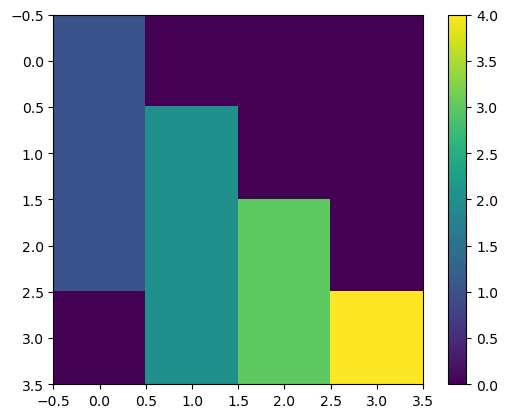

For b=[1 2 3 4], the solution x to Mx=b is [1.         0.5        0.33333333 0.5       ]
And indeed, Mx - b = [0. 0. 0. 0.]


In [3]:
# This is how to create a sparse matrix from a given list of subdiagonals.
diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
M = diags(diagonals, [0, 1, 2]) # type: ignore
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.")
print(M.toarray())

M = diags(diagonals, [0, -1, -2]) # type: ignore
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.")
print(M.toarray())

print("If you want to visualize the matrix for yourself, use `plt.imshow`:")
plt.imshow(M.toarray())
plt.colorbar()
plt.show()

# This is how to solve sparse systems.
b = np.array([1, 2, 3, 4])
x = spsolve(M, b)
print("For b={}, the solution x to Mx=b is {}".format(b, x))
print("And indeed, Mx - b = {}".format(M.dot(x) - b))

--------
# Exercise 1
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$ \tag{1} y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

The purpose of this exercise is to approximate the solution to this boundary value problem, by discretizing the problem and then solving the resulting system of nonlinear equations. 

Problem (1) will be discretized using finite differences. Suppose we use $n+2$ discretization points for $x$, denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = 1/(n+1)$. The approximate solution is denoted $y_k = y(x_k)$. 

We will use a _second-order central finite difference_ approximation for the second derivative: 

$$ \tag{2} y''(x_k) \approx \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2}.$$

The term $\exp(y(x_k))$ can simply be approximated by $\exp(y_k)$. Thus for $x=x_k$, equation (1) becomes

$$ \tag{3} \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

The boundary conditions (the conditions $y(0) = y(1) = 1$), lead to the requirement that $y_0 = y_{n+1} = 0$. To find the remaining values $y_k$, $k=1, \ldots, n$, equation (3) will be used for $k = 1, \ldots, n$. In this way, one obtains $n$ equations for $n$ unknowns, to which, in principle, a rootfinding method can be applied.

We will write $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ for the vector of values to be determined. 


## In my own terms:
- Boundary value problems are problems where you are given a differential equation and boundary conditions, and you are asked to find a function that satisfies both.
- The finite difference method is a way to approximate the solution to a boundary value problem by discretizing the domain and approximating the derivatives in the differential equation with finite differences.
- We are looking for a function that satisfies:
$$y''(x) + e^{y(x)} = 0$$
- With the constaints:
$$0 < x < 1, \quad y(0) = y(1) = 1$$

## (a)  (2 pts)
As a first step, finish the function `SecondDerMatrix` that returns a matrix $\bf{M}$ that maps the vector $\vec y$ to the vector of the approximate values $y''(x_k)$, $k=2, \ldots, n$ given in (2). To get full points for this part of the exercise you must create output in the form of a sparse matrix.

In [4]:
def SecondDerMatrix(n):
    '''Returns sparse matrix to map y one to second order derivative of y'''
    main_diag =  -2 * np.ones(n)
    middle_diag =  np.ones(n-1)
    upper_diag = np.ones(n-1)
    A = np.diag(main_diag) + np.diag(middle_diag, k=-1) + np.diag(upper_diag, k=1)
    # A = diags([np.ones(n-1), np.full(n, -2), np.ones(n-1)], [-1, 0, 1])
    h = 1/(n+1)

    return csr_array(A/h**2)

## (b)  (1 pt)
Second-order central finite differences are exact for quadratic functions. In order to test your implementation, choose $n=10$ and apply the second derivative matrix from part (a) to a quadratic function $y(x)$ with $y(0) = y(1) = 0$ for which you know the second derivative $y''(x)$.

$(2x - 1)^2 - 1$

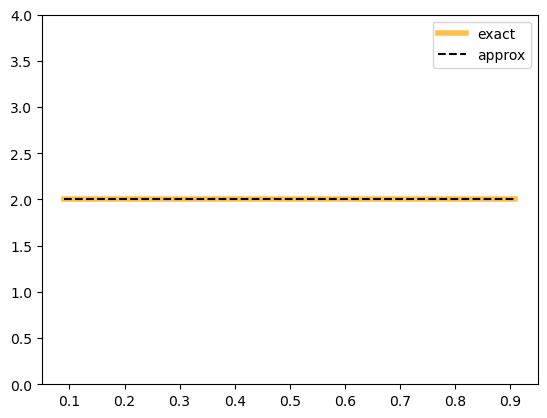

In [5]:
def quadratic(x):
    return x**2 -x 

def second_derivative(x):
    return 2 

n = 10
steps = np.linspace(0,1,n+2, endpoint=True)[1:-1]
vec_quad = np.vectorize(quadratic)
vec_der = np.vectorize(second_derivative)

exact_y = vec_quad(steps)
exact_der_y = vec_der(steps) 
A = SecondDerMatrix(n)
approx_der_y = A @ exact_y

plt.plot(steps, exact_der_y, label='exact', linewidth=4, alpha=0.7, color='orange')
plt.plot(steps, approx_der_y, label='approx', linestyle='--', color='black')
plt.ylim((0,4))
plt.legend()
plt.show()


## (c) (2 pts)

Defining $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ and 
$E(\vec y) = \begin{bmatrix} \exp(y_1) \\ \vdots \\ \exp(y_n) \end{bmatrix}$, the equations (3) can be written in the form

$$ F(\vec y) := {\bf M} \cdot \vec y + E(\vec y) = \vec 0. $$

Finish the function `F` that defines $F(\vec y) = {\bf M} \cdot \vec y + E(\vec y)$.
Finish the function `JacobianF` that computes the Jacobian ${\bf J}_F(\vec y)$ of $F(\vec y)$.
To get full points for this part of the exercise, the Jacobian must be computed in the form of a sparse matrix.

exact min = 2.7804115390294966 = approx min = 2.7804115390294966


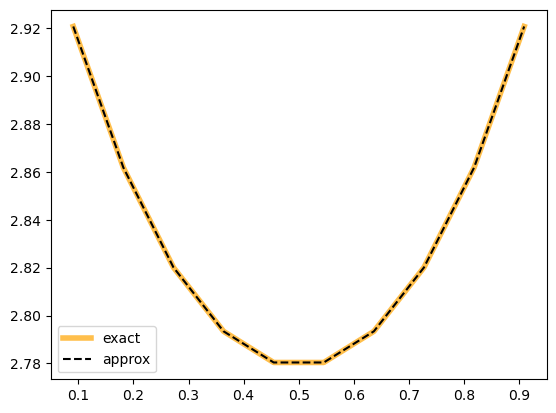

In [6]:
def F(y):
    n = len(y)
    M = SecondDerMatrix(n)
    return (M @ y) + np.exp(y)
    
def JacobianF(y):  
    '''Returns Jacobian of F given a vector y'''
    return SecondDerMatrix(len(y)) + diags(np.exp(y))

approx_data = F(exact_y)
exact_data = exact_der_y + np.exp(exact_y)
min_y_approx = min(approx_data)
min_y_exact = min(exact_data)
print(f'exact min = {min_y_exact} = approx min = {min_y_approx}')
plt.plot(steps, exact_der_y + np.exp(exact_y), label='exact', linewidth=4, alpha=0.7, color='orange')
plt.plot(steps, approx_data, label='approx', linestyle='--', color='black')
plt.legend()
plt.show()

## (d)  (3 pts)
1. Write down the first order Taylor expansion $T_F(\vec y, \vec s)$ for $F(\vec y+\vec s)$.
2. In order to check your implementation of the Jacobian matrix, compute and print both $F(\vec y+\vec s)$ and its first order Taylor approximation $T_F(\vec y, \vec s)$ for a choice $\vec y$ and $\vec s$.
3. Verify numerically that the error $||F(\vec y + \vec s) - T_F(\vec y, \vec s)||_2$ is $\mathcal O(||\vec s||_2^2)$. Hint: take vectors $\vec s$ with $\|\vec s\|_2 = \mathcal O(h)$  for multiple values for $h$, e.g. $h = 10^{-k}$ for a range of $k$. 

Subquestion 1.
$$T_{F}(\mathbf{y}, \mathbf{s}) = F(\mathbf{y}) + M + E(\mathbf{y}) (\mathbf{y} - \mathbf{s})$$


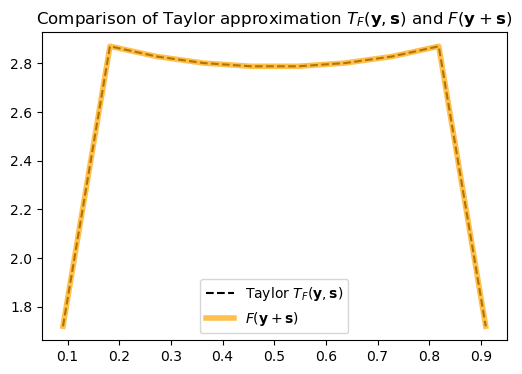

h = 0.1, error = 2.82e-03, O_error = 1.00e-02
h = 0.01, error = 2.79e-05, O_error = 1.00e-04
h = 0.001, error = 2.79e-07, O_error = 1.00e-06
h = 0.0001, error = 2.79e-09, O_error = 1.00e-08
h = 1e-05, error = 2.79e-11, O_error = 1.00e-10
h = 1e-06, error = 2.96e-13, O_error = 1.00e-12
h = 1e-07, error = 3.59e-14, O_error = 1.00e-14


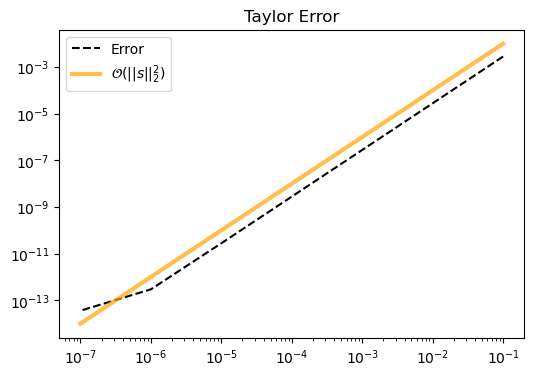

In [15]:
# Subquestions 2 and 3.
def TaylorF(y, h):
    '''Returns Taylor approximation of F at y with step size h'''
    return F(y) + JacobianF(y) @ h


s = np.full(n, 10**-2)
taylor_approx = TaylorF(exact_y, s)
approx_data = F(exact_y + s)

plt.figure(figsize=(6,4))
plt.title('Comparison of Taylor approximation $T_{F}(\\mathbf{y}, \\mathbf{s})$ and $F(\\mathbf{y} + \\mathbf{s})$')
plt.plot(steps, taylor_approx, label='Taylor $T_{F}(\\mathbf{y}, \\mathbf{s})$', linestyle='--', color='black')
plt.plot(steps, approx_data, label='$F(\\mathbf{y} + \\mathbf{s})$', linewidth=4, alpha=0.7, color='orange')
plt.legend()
plt.show()


def explore_taylor_error(h_space, n=10):
    errors = []
    O_errors = []
    exact_y = np.linspace(0,1,n+2, endpoint=True)[1:-1]
    for h in h_space:
        s = np.ones(n)
        s = s / np.linalg.norm(s) * h
        approx_data = F(exact_y + s)
        taylor_approx = TaylorF(exact_y, s)
        error = np.linalg.norm(approx_data - taylor_approx)
        O_error = h**2
        errors.append(error)
        print(f'h = {h}, error = {error:.2e}, O_error = {O_error:.2e}')
        O_errors.append(O_error)
    return errors, O_errors

h_space = [10**-i for i in range(1, 8) ] 
errors, O_errors = explore_taylor_error(h_space,10)

plt.figure(figsize=(6,4))
plt.title('Taylor Error')
plt.plot(h_space, errors, label='Error', color='black', linestyle='--')
plt.plot(h_space, O_errors, label='$\\mathcal{O}(||s||_2^2)$', color='orange', alpha=0.7, linewidth=3)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

## (e) (2 pts)
1. Finish the function `NewtonSolve` below to solve the system of equations.
2. Take $n=40$, and experiment with your function. Try to find a choice of `y0` such that the method doesn't converge, as well as a choice of `y0` such that the method converges. In your answer, list the types of convergence behavior you found. Show a convergent example (if you found any) and a nonconvergent example (if you found any). Show the solutions you found for each example.

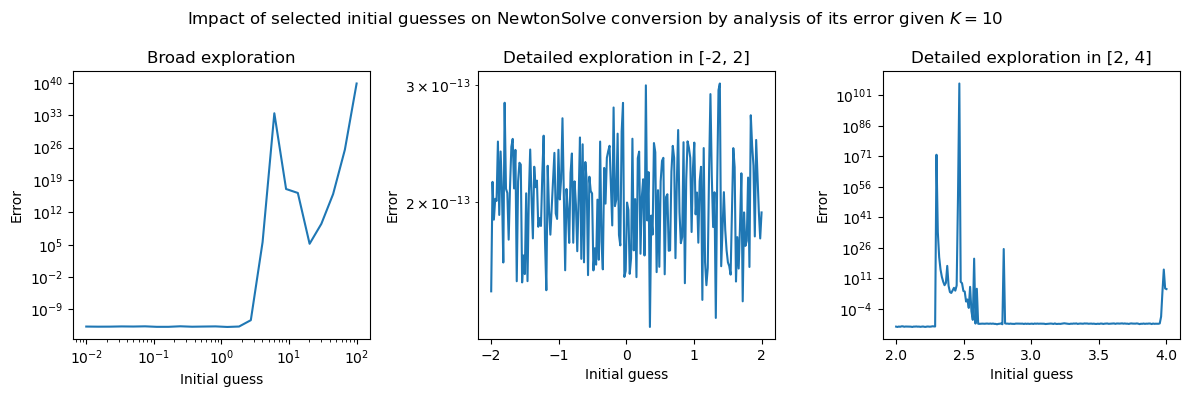

In [8]:
# Subquestion 1.
def NewtonSolve(y0, K):
    """ Use Newton's method to solve F(y) = 0 with initial guess y0 and K iterations. """
    y = y0
    delta = 1
    while np.linalg.norm(delta) > 1e-6 and K > 0:
        jac = JacobianF(y)
        new = y - spinv(jac) @ F(y) 
        delta = y - new
        y = new
        K -= 1
    return y 

def explore_newtonsolver_error(space, K=10, dim=40):
    errors = []
    for n in space:
        guess = np.full(dim, n)
        approx_sol = NewtonSolve(guess, K)
        error = np.linalg.norm(F(approx_sol))
        errors.append(error)
    return errors

space = np.logspace(-2, 2, 24)
errors = explore_newtonsolver_error(space)

fig = plt.figure(figsize=(12,4), layout='tight')
fig.suptitle('Impact of selected initial guesses on NewtonSolve conversion by analysis of its error given $K=10$')
fig.add_subplot(131)
plt.plot(space, errors)
plt.title('Broad exploration')
plt.xlabel('Initial guess')
plt.ylabel('Error')
plt.xscale('log')
plt.yscale('log')

space = np.linspace(-2, 2, 202)
errors = explore_newtonsolver_error(space)

fig.add_subplot(132)
plt.plot(space, errors)
plt.title('Detailed exploration in [-2, 2]')
plt.xlabel('Initial guess')
plt.ylabel('Error')
plt.yscale('log')

space = np.linspace(2, 4, 202)
errors = explore_newtonsolver_error(space)

fig.add_subplot(133)
plt.plot(space, errors)
plt.title('Detailed exploration in [2, 4]')
plt.xlabel('Initial guess')
plt.ylabel('Error')
plt.yscale('log')
plt.show()

In [9]:
converging_guess = np.full(40, 2)
approx_sol = NewtonSolve(converging_guess, 10)
F_approx_sol = F(approx_sol)
non_converging_guess = np.full(40, 5)
approx_sol_2 = NewtonSolve(non_converging_guess, 10)
F_approx_sol_2 = F(approx_sol_2)

DataFrame({'Solution with conversion c_sol': approx_sol, 'F(c_sol)': F_approx_sol, 'Solution without conversion no_c_sol': approx_sol_2, 'F(no_c_sol)': F_approx_sol_2})

,Solution with conversion c_sol,F(c_sol),Solution without conversion no_c_sol,F(no_c_sol)
0,0.013101,3.774758e-15,0.775937,0.090457
1,0.025599,-9.325873e-15,1.550636,0.940188
2,0.037487,1.310063e-14,2.323090,5.495863
3,0.048757,-3.996803e-15,3.092741,25.672838
4,0.059402,2.220446e-15,3.864554,116.549564
5,0.069417,-2.975398e-14,4.677336,688.778744
6,0.078793,-2.353673e-14,5.835921,2420.698037
7,0.087526,1.598721e-14,8.230864,341.929419
8,0.095610,-1.310063e-14,8.595380,2741.322708
9,0.103039,3.130829e-14,7.374351,13595.943495
